In [20]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.applications import ResNet101

In [21]:

train_dir = r".\dataset1\train"
val_dir = r".\dataset1\validation"

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# parameters
img_size = (224,224)
batch_size = 32
epochs = 100
num_classes = 6


#load training and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)
 
    


Found 4200 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


# For Training with Resnet152

In [3]:
# load pre-trained model without top (fully connected layers)
base_model_ = ResNet152(weights='imagenet', include_top = False, 
                      input_shape=(224,224,3))

# freeze the pre-trained layers
for layer in base_model_.layers:
    layer.trainable = False

In [5]:
# Build the model with Global Average Pooling
model = models.Sequential()
model.add(base_model_)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/100
131/131 [==============================] - 71s 437ms/step - loss: 1.7580 - accuracy: 0.2582 - val_loss: 1.7493 - val_accuracy: 0.3316
Epoch 2/100
131/131 [==============================] - 53s 405ms/step - loss: 1.6539 - accuracy: 0.3558 - val_loss: 1.6897 - val_accuracy: 0.3073
Epoch 3/100
131/131 [==============================] - 53s 401ms/step - loss: 1.5734 - accuracy: 0.4575 - val_loss: 1.6154 - val_accuracy: 0.5712
Epoch 4/100
131/131 [==============================] - 52s 398ms/step - loss: 1.5087 - accuracy: 0.5094 - val_loss: 1.5768 - val_accuracy: 0.4583
Epoch 5/100
131/131 [==============================] - 58s 445ms/step - loss: 1.4545 - accuracy: 0.5588 - val_loss: 1.5471 - val_accuracy: 0.5625
Epoch 6/100
131/131 [==============================] - 52s 395ms/step - loss: 1.4003 - accuracy: 0.5765 - val_loss: 1.4989 - val_accuracy: 0.5486
Epoch 7/100
131/131 [==============================] - 53s 402ms/step - loss: 1.3468 - accuracy: 0.6219 - val_loss: 1.4249 -

In [7]:
# Evaluate the model (on validation set)
loss, accuracy = model.evaluate(validation_generator)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)

19/19 [==============================] - 4s 185ms/step - loss: 0.3589 - accuracy: 0.9717
Validation Loss: 0.3589053153991699
Validation Accuracy: 0.971666693687439


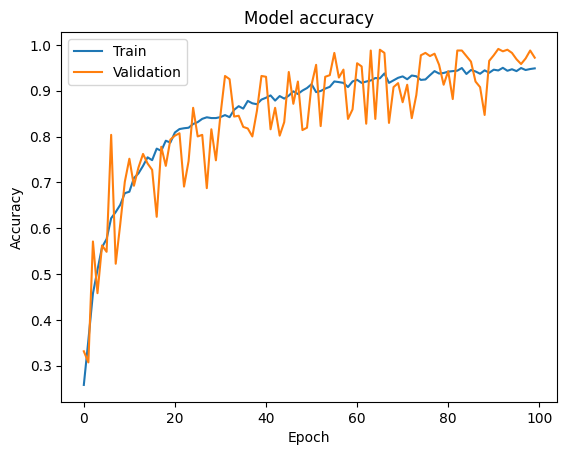

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
model.save('six_face_resnet152.h5')


In [11]:
# Testing the model 
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('six_face_resnet152.h5')

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the saved model
#loaded_model = load_model('three_face_resnet152.h5')
loaded_model = load_model('six_face_resnet152.h5')


(224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
1/1 [==============================] - 4s 4s/step
Prediction class : 1


In [19]:
img_path = [r'.\dataset1\train\cillian murphy\cillian murphy_1.jpg',
            r'.\dataset1\Elon\Elon_1.jpg',
            r'.\dataset1\Rashford\Rashford_1.jpg',
            r'.\dataset1\Robert\Robert_1.jpg',
            r'.\dataset1\Ronaldo\Ronaldo_1.jpg',
            r'.\dataset1\Zlatan\Zlatan_1.jpg'
]

img = image.load_img(img_path[0],target_size=(224,224))
img_array = image.img_to_array(img)
print(img_array.shape)
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)
img_array = img_array / 255.0
print(img_array.shape)

# prediction 
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions)
print(f"Prediction class : {predicted_class}")

# map predict class
class_labels = ['cillian murphy','Elon','Rashford','Robert','Ronaldo','Zlatan']
predicted_label = class_labels[predicted_class]

print("Predicted class:", predicted_label)


(224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
1/1 [==============================] - 0s 59ms/step
Prediction class : 1
Predicted class: Elon


# For Training with Resnet50 

In [22]:
# load pre-trained model without top (fully connected layers)
base_model_resnet50 = ResNet50(weights='imagenet', include_top = False, 
                      input_shape=(224,224,3))

# freeze the pre-trained layers
for layer in base_model_resnet50.layers:
    layer.trainable = False

In [23]:
# Build the model with Global Average Pooling
resnet50_model = models.Sequential()
resnet50_model.add(base_model_resnet50)
resnet50_model.add(layers.GlobalAveragePooling2D())
resnet50_model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
resnet50_history = resnet50_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/100
131/131 [==============================] - 435s 3s/step - loss: 1.8078 - accuracy: 0.1775 - val_loss: 1.7761 - val_accuracy: 0.1667
Epoch 2/100
131/131 [==============================] - 84s 575ms/step - loss: 1.7555 - accuracy: 0.2289 - val_loss: 1.7392 - val_accuracy: 0.1632
Epoch 3/100
131/131 [==============================] - 48s 363ms/step - loss: 1.7179 - accuracy: 0.3047 - val_loss: 1.7235 - val_accuracy: 0.1632
Epoch 4/100
131/131 [==============================] - 48s 364ms/step - loss: 1.6841 - accuracy: 0.3289 - val_loss: 1.6869 - val_accuracy: 0.4358
Epoch 5/100
131/131 [==============================] - 49s 376ms/step - loss: 1.6496 - accuracy: 0.3688 - val_loss: 1.6759 - val_accuracy: 0.1684
Epoch 6/100
131/131 [==============================] - 49s 374ms/step - loss: 1.6159 - accuracy: 0.4100 - val_loss: 1.6276 - val_accuracy: 0.3507
Epoch 7/100
131/131 [==============================] - 48s 367ms/step - loss: 1.5925 - accuracy: 0.4203 - val_loss: 1.5919 - v

In [24]:
resnet50_model.save('six_face_resnet50.h5')


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('six_face_resnet50.h5')

img_path = r'.\dataset1\train\cillian murphy\cillian murphy_89.jpg'
img = image.load_img(img_path,target_size=(224,224))
img_array = image.img_to_array(img)
print(img_array.shape)
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)
img_array = img_array / 255.0
print(img_array.shape)

# prediction 
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions)
print(f"Prediction class : {predicted_class}")

# map predict class
class_labels = ['cillian murphy','Elon','Rashford','Robert','Ronaldo','Zlatan']
predicted_label = class_labels[predicted_class]

print("Predicted class:", predicted_label)


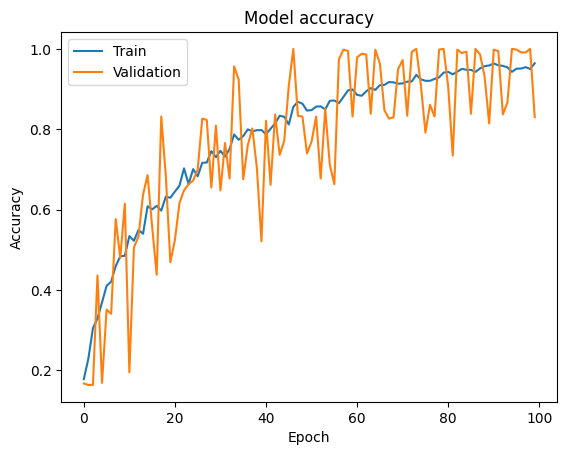

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(resnet50_history.history['accuracy'])
plt.plot(resnet50_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# For Training with Resnet 101

In [26]:
# load pre-trained model without top (fully connected layers)
base_model_resnet101 = ResNet101(weights='imagenet', include_top = False, 
                      input_shape=(224,224,3))

# freeze the pre-trained layers
for layer in base_model_resnet101.layers:
    layer.trainable = False

In [27]:
# Build the model with Global Average Pooling
resnet101_model = models.Sequential()
resnet101_model.add(base_model_resnet101)
resnet101_model.add(layers.GlobalAveragePooling2D())
resnet101_model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
resnet101_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
resnet101_history = resnet101_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)



Epoch 1/100
131/131 [==============================] - 62s 426ms/step - loss: 1.7635 - accuracy: 0.2253 - val_loss: 1.7037 - val_accuracy: 0.3385
Epoch 2/100
131/131 [==============================] - 53s 406ms/step - loss: 1.6538 - accuracy: 0.3618 - val_loss: 1.6268 - val_accuracy: 0.5278
Epoch 3/100
131/131 [==============================] - 54s 412ms/step - loss: 1.5612 - accuracy: 0.4352 - val_loss: 1.5335 - val_accuracy: 0.5816
Epoch 4/100
131/131 [==============================] - 53s 406ms/step - loss: 1.4854 - accuracy: 0.4926 - val_loss: 1.4530 - val_accuracy: 0.6597
Epoch 5/100
131/131 [==============================] - 52s 397ms/step - loss: 1.4156 - accuracy: 0.5552 - val_loss: 1.4111 - val_accuracy: 0.4809
Epoch 6/100
131/131 [==============================] - 52s 393ms/step - loss: 1.3486 - accuracy: 0.6425 - val_loss: 1.3369 - val_accuracy: 0.6684
Epoch 7/100
131/131 [==============================] - 52s 394ms/step - loss: 1.2964 - accuracy: 0.6332 - val_loss: 1.3050 -

In [28]:
resnet101_model.save('six_face_resnet101.h5')


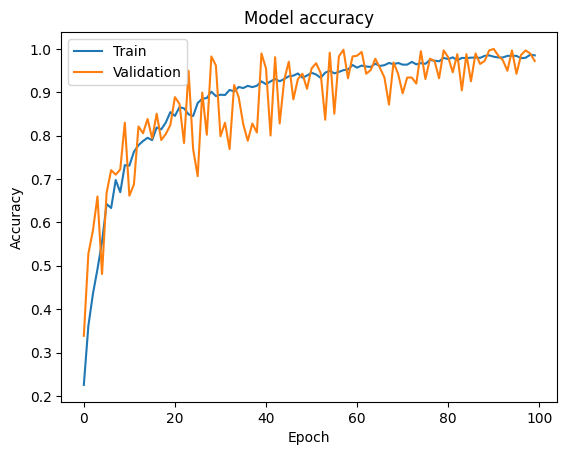

In [29]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(resnet101_history.history['accuracy'])
plt.plot(resnet101_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()